# 나무위키 변경내역 크롤링

## 전체적인 구조 분석
table -> tr -> td-> a

In [1]:
import requests
from bs4 import BeautifulSoup
import re

In [2]:
source_url = "https://namu.wiki/RecentChanges"

In [3]:
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml') #soup = BeautifulSoup(req.text, 'html.parser')


In [4]:
contents_table = soup.find(name = "table") #전체 표
table_body = contents_table.find(name="tbody") #맨 위 coluumn 제거한 표 본문
table_rows = table_body.find_all(name="tr") # 각 항목들

## URL 크롤링

In [5]:
page_url_base = "https://namu.wiki"
page_urls = []
for index  in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0] #첫번째 항목의 html태그들 출력됨(밑의 사진 참조)
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url 제거
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EC%84%9C%EC%98%88%EC%A7%80
https://namu.wiki/w/%EC%83%98%20%EC%98%A4%EC%B7%A8%EB%A6%AC
https://namu.wiki/w/%EB%8F%84%EC%BF%A0%EC%8B%9C%EB%A7%88%ED%98%84
https://namu.wiki/w/%EC%82%AC%EC%9D%B4%EB%B2%84%ED%8E%91%ED%81%AC%202077/%EB%93%B1%EC%9E%A5%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%EC%B9%B4%EC%9D%B8(%EB%A9%94%EC%9D%B4%ED%94%8C%EC%8A%A4%ED%86%A0%EB%A6%AC)/%EC%8A%A4%ED%86%A0%EB%A6%AC%20%EB%B0%8F%20%ED%80%98%EC%8A%A4%ED%8A%B8


In [6]:
# 최근 변경된 내역들의 url이 리스트로 저장되어 있음
page_urls

['https://namu.wiki/w/%EC%84%9C%EC%98%88%EC%A7%80',
 'https://namu.wiki/w/%EC%83%98%20%EC%98%A4%EC%B7%A8%EB%A6%AC',
 'https://namu.wiki/w/%EB%8F%84%EC%BF%A0%EC%8B%9C%EB%A7%88%ED%98%84',
 'https://namu.wiki/w/%EC%82%AC%EC%9D%B4%EB%B2%84%ED%8E%91%ED%81%AC%202077/%EB%93%B1%EC%9E%A5%EC%9D%B8%EB%AC%BC',
 'https://namu.wiki/w/%EC%B9%B4%EC%9D%B8(%EB%A9%94%EC%9D%B4%ED%94%8C%EC%8A%A4%ED%86%A0%EB%A6%AC)/%EC%8A%A4%ED%86%A0%EB%A6%AC%20%EB%B0%8F%20%ED%80%98%EC%8A%A4%ED%8A%B8',
 'https://namu.wiki/w/%EC%A0%95%EB%B3%B4%EC%9C%84%EC%9B%90%ED%9A%8C',
 'https://namu.wiki/w/%EB%8B%9B%EC%82%B0%20%ED%8B%B0%EC%95%84%EB%82%98',
 'https://namu.wiki/w/%EA%B1%B4%EB%9E%9C%EC%8A%A4(%EB%AA%AC%EC%8A%A4%ED%84%B0%20%ED%97%8C%ED%84%B0%20%EB%9D%BC%EC%9D%B4%EC%A6%88)',
 'https://namu.wiki/w/%EB%A1%9C%EB%A7%A8%EC%8A%A4%20%ED%8C%90%ED%83%80%EC%A7%80',
 'https://namu.wiki/w/Redline%20Rumble',
 'https://namu.wiki/w/%EC%8B%A0%ED%98%95%EB%AF%BC',
 'https://namu.wiki/w/%EB%8D%95%20%ED%81%B4%EB%9D%BD',
 'https://namu.wiki/w/%EC%

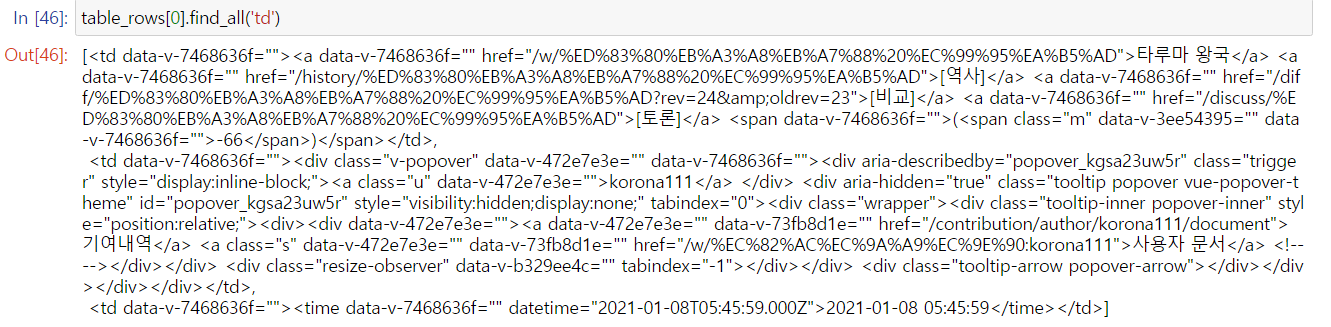

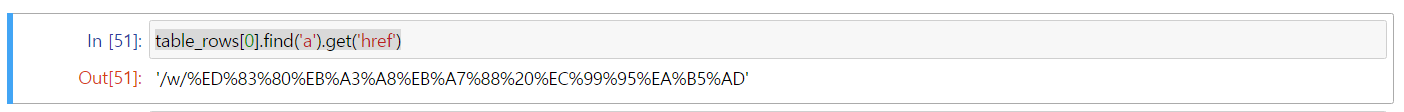

## 텍스트 크롤링(URL 하나 방문하여 변경내역 직접 크롤링)

In [7]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')

In [8]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

서예지 


한국 여배우/ㅅ1990년 출생이천 서씨영등포구 출신 인물2013년 데뷔대한민국의 개신교 신자


이 문서는이 문단은 토론을 통해 최종 학력을 영신고등학교 유지하기(으)로 합의되었습니다. 합의된 부분을 토론 없이 수정할 시 제재될 수 있습니다. 아래 토론들로 합의된 편집방침이 적용됩니다. 합의된 부분을 토론 없이 수정할 시 제재될 수 있습니다. [ 내용 펼치기 · 접기 ]토론 - 최종 학력을 영신고등학교 유지하기토론 - 합의사항2토론 - 합의사항3토론 - 합의사항4토론 - 합의사항5토론 - 합의사항6토론 - 합의사항7토론 - 합의사항8토론 - 합의사항9토론 - 합의사항10토론 - 합의사항11토론 - 합의사항12토론 - 합의사항13토론 - 합의사항14토론 - 합의사항15토론 - 합의사항16토론 - 합의사항17토론 - 합의사항18토론 - 합의사항19토론 - 합의사항20토론 - 합의사항21토론 - 합의사항22토론 - 합의사항23토론 - 합의사항24토론 - 합의사항25토론 - 합의사항26토론 - 합의사항27토론 - 합의사항28토론 - 합의사항29토론 - 합의사항30토론 - 합의사항31토론 - 합의사항32토론 - 합의사항33토론 - 합의사항34토론 - 합의사항35토론 - 합의사항36토론 - 합의사항37토론 - 합의사항38토론 - 합의사항39토론 - 합의사항40토론 - 합의사항41토론 - 합의사항42토론 - 합의사항43토론 - 합의사항44토론 - 합의사항45토론 - 합의사항46토론 - 합의사항47토론 - 합의사항48토론 - 합의사항49토론 - 합의사항50토론 - 최종 학력을 영신고등학교 유지하기토론 - 합의사항2토론 - 합의사항3토론 - 합의사항4토론 - 합의사항5토론 - 합의사항6토론 - 합의사항7토론 - 합의사항8토론 - 합의사항9토론 - 합의사항10토론 - 합의사항11토론 - 합의사항12토론 - 합의사항13토론 - 합의사항14토론 - 합의사항15토론 - 합의사항16토론 - 합의사항17토론 - 합의사항18토론 - 합의사항19토론 - 합의사항20토론 - 합의

# 전체 크롤링 후 정리하기

In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
import requests

In [10]:
# 정리한 Data를 담을 DataFrame 만들기
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns = columns)
df

,title,category,content_text


In [21]:
#article(전체 피이지) -> title(h1 태그) -> category(ul 태그) 
#->content_pagraph(본문내용div태그에서 클래스가 wiki-pagraph)
#page_url 끝까지하면 너무 오래걸려서 50개만 해봄

for page_url in page_urls[0:50]:
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name = 'article')
    title = contents_table.find_all('h1')[0]
    category = contents_table.find_all('ul')[0]
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []

- 오류남. 왜냐? (운이 좋으면 물론 안 날 수도 있음.)
> 모든 데이터에는 "이상값"들이 있기떄문.

예시)
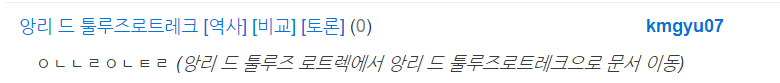

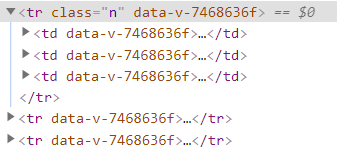

In [22]:
for page_url in page_urls[0:50]:
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name = 'article')
    title = contents_table.find_all('h1')[0]
    category = contents_table.find_all('ul')[0]
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 1 제목 이상값 처리
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 2 카테고리 이상값 처리
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category =""
    
    # 3 내용 이상값 처리
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
    
    # 이제 최종적으로 DF에 정리해보자
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
    
df.head(5)

,title,category,content_text
0,서예지,한국 여배우ㅅ년 출생이천 서씨영등포구 출신 인물년 데뷔대한민국의 개신교 신자,이 문서는이 문단은 토론을 통해 최종 학력을 영신고등학교 유지하기으로 합의되었습니다...
1,샘 오취리,년 출생년 데뷔아크라 출신 인물재한 가나인비정상회담멤버서강대학교 출신가나의 개신교 ...,이 문서는이 문단은 토론을 통해 관짝밈에 대한 얘기는 본 문서에 다중 관점을 적용하...
2,도쿠시마현,도쿠시마현,은는 여기로 연결됩니다 도쿠시마현에 위치한 동명의 도시에 대한 내용은 도쿠시마시...
3,사이버펑크 등장인물,사이버펑크 등장인물,로그인 후 편집 가능한 문서입니다 상위 문서 사이버펑크 펼치기 접기 스토...
4,카인메이플스토리스토리 및 퀘스트,메이플스토리직업별 스토리 및 퀘스트다크 판타지,상위 문서 카인메이플스토리이 문서에 스포일러가 포함되어 있습니다이 문서가 설명하...


* 위에서 특수문자들은 굳이 필요없음으로 제거하자. 이 떄 필요한 과정이 전처리

# 텍스트 전처리

* 텍스트 전처리의 경우 re모듈을 사용해야 하는데 초보자가 이해하고 처리하기엔 너무 어렵다. 걍 복붙해서 사용하도록 하자.

In [23]:
# 텍스트 전처리 함수를 만들자
# re.sub('패턴', 교체함수, '문자열', 바꿀횟수)
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [24]:
# 이제 테스트를 해보자
print(text_cleaning(df['content_text'][0]))

이 문서는이 문단은 토론을 통해 최종 학력을 영신고등학교 유지하기으로 합의되었습니다 합의된 부분을 토론 없이 수정할 시 제재될 수 있습니다 아래 토론들로 합의된 편집방침이 적용됩니다 합의된 부분을 토론 없이 수정할 시 제재될 수 있습니다  내용 펼치기  접기 토론  최종 학력을 영신고등학교 유지하기토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  최종 학력을 영신고등학교 유지하기토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항토론  합의사항     펼치기  접기  김새론김수겸 김수현김승호

In [25]:
# 이제 각  Feature(열)들에게 적용한다

df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))

# 총 결과

In [30]:
df.head()

,title,category,content_text
0,서예지,한국 여배우ㅅ년 출생이천 서씨영등포구 출신 인물년 데뷔대한민국의 개신교 신자,이 문서는이 문단은 토론을 통해 최종 학력을 영신고등학교 유지하기으로 합의되었습니다...
1,샘 오취리,년 출생년 데뷔아크라 출신 인물재한 가나인비정상회담멤버서강대학교 출신가나의 개신교 ...,이 문서는이 문단은 토론을 통해 관짝밈에 대한 얘기는 본 문서에 다중 관점을 적용하...
2,도쿠시마현,도쿠시마현,은는 여기로 연결됩니다 도쿠시마현에 위치한 동명의 도시에 대한 내용은 도쿠시마시...
3,사이버펑크 등장인물,사이버펑크 등장인물,로그인 후 편집 가능한 문서입니다 상위 문서 사이버펑크 펼치기 접기 스토...
4,카인메이플스토리스토리 및 퀘스트,메이플스토리직업별 스토리 및 퀘스트다크 판타지,상위 문서 카인메이플스토리이 문서에 스포일러가 포함되어 있습니다이 문서가 설명하...


*** 여기서부터는 아래 그림처럼 시각화를 해 볼 것임. 단, konply 설치가 필수인데 이거 설명이 귀찮음으로 이것은 분들의 설명을 참고할 것***

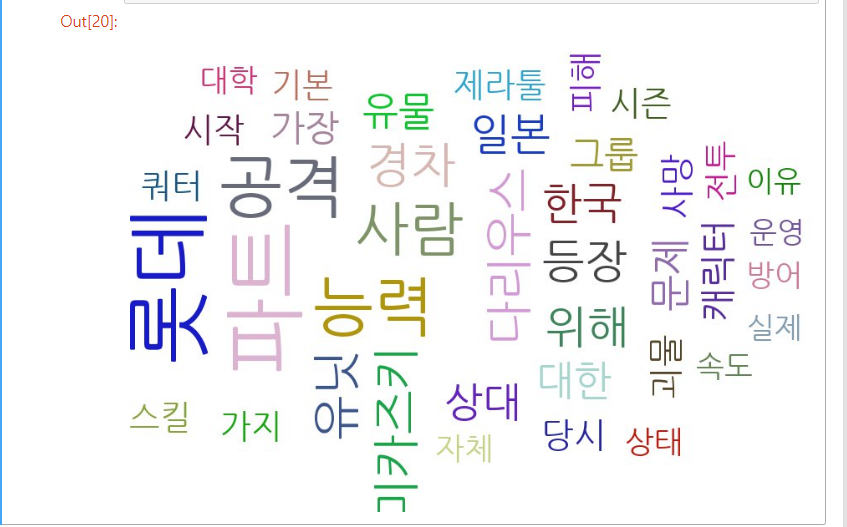